You can save your work offline (without risk of loss of data) by using `File->Download`. Later you can upload your creationg back to the online environment using the "upload" button 

# Approximating a square wave using sinusoids


We are looking at the (1-periodic) square wave. On $[-1/2, 1/2]$ it looks like this

$$
\mathrm{Sq}(x) = \begin{cases}-1 &\text{if } x<0 \\ 1 &\text{if } x>0 \end{cases}
$$

**Goal:** Find the numbers $a_n$ such that 
$$
a_1 \sin(2π\, x)+a_2 \sin(2π\, 2x)+\ldots + a_N \sin(2π\, N x)
$$
is "close" to $\mathrm{Sq}(x)$.


## Setup

In [1]:
# SETUP CELL
%pip -q install numpy sympy matplotlib ipywidgets pandas plotly anywidget

Note: you may need to restart the kernel to use updated packages.


In [2]:
# SETUP CELL 
from gu_toolkit import *
from helpers.Fourier_02_helper import *

## The square wave

Let us define and plot the square wave. 

Zoom out to see how it behaves over larger time intervals. 


In [3]:
@NamedFunction
def Sq(x):
    return sign(sin(2*pi*x))

# Display it on a figure.
fig_square = Figure(x_range=(-1 / 2, 1 / 2), y_range=(-2, 2))
display(fig_square)
fig_square.plot(x, Sq(x), id="Sq")
fig_square.title = r"$\text{The square wave} \mathrm{Sq}(x)$"

OneShotOutput()

## Build a sine-sum model with adjustable parameters

Now you will build a *model*:
$$
\sum_{n=1}^{N} a_n\,\sin(2\pi n x).
$$

with numbers $a_1,\dots,a_{N}$  *you control*.

**Goal:** Use sliders to tune the numbers $a_1,a_2,\ldots$ so that your model matches the mystery function $\mathrm{Sq}(x)$.

**Question** How many modes are you going to use? The code below starts with $2$. You will probably need more. *First start with just two modes*

**Definition of the model**

In [4]:
# Model
model = a[1] * sin(2 * pi * 1 * x) + a[2] * sin(2 * pi * 2 * x)
display(model)

a_1*sin(2*pi*x) + a_2*sin(4*pi*x)

### Plot mystery vs model (with sliders)

This is the main interactive plot.

Try to make the two curves overlap as closely as you can.


In [5]:
fig = Figure(x_range=(-1 / 2, 1 / 2), y_range=(-2.5, 2.5))
fig.title = r"Fitting the model to $\mathrm{Sq}(x)$"
display(fig)

fig.plot(x, Sq(x), id="Sq(x)")
fig.plot(x, model, id="model")
# Provide feeback on difference between F and model
card = fig.add_info_component("info:F_minus_model", MaxDistanceCard(x,Sq(x),model), hook_id="supnorm:F_minus_model")


OneShotOutput()

## Question 1

We are trying to get the largest distance between the function $\mathrm{Sq}(x)$ and the model to be smal. Can you make it smaller than $1$? Start by changing only $a_1$ and $a_2$. 


### Further investigation: plotting the partial sums and the difference

To understand this better, let us increase the numeber of parameters and define the *partial* sums:
$$
S_1(x)=a_1 \sin(2π\,x)
$$
$$
S_2(x)=a_1 \sin(2π\,x)+ a_2 \sin(2π\,2x)
$$
$$
S_3(x)=a_1 \sin(2π\,x)+ a_2 \sin(2π\,2x)+a_3 \sin(2π\,3x)
$$
and so on. To quickly generate multiple expressions and add them to the plot in Python we are going to use a loop:
```python
Nmax = 8
S = [0]
for n in range(Nmax):
    expr = S[-1] + a[n + 1] * sin(2 * pi * (n + 1) * x)
    S.append(expr)
for n in range(Nmax):
    display(Latex(f"$S_{n + 1}(x)={latex(S[n + 1])}$"))
    fig.plot(x, S[n + 1], id=f"S{n + 1}")
```
Don't worry, you can turn off the single displayed plots if there are too many of them by clicking on the *legend* in the plot. But do not make `Nmax` too large. It is better not to exceed 12.

*Note*: In python `range(n)` gives the integers from `0` to `n-1` (`n` is not included). That is why we use `n+1` in the expressions above

To best fit the function $\mathrm{Sq}(x)$ you may need to allow $a_1,a_2, a_3$ to be larger than $1$. A reasonable limit is $2$. Use the cogwheel to set up the limits for the parameters

### The functions "look closer" but the maximum distance is still at least 1

Why does that happen. Try to plot the differences of $S_n(x)$ with $\mathrm{Sq}(x)$ using this loop:
```python
for n in range(Nmax):
    display(Latex(f"Plotting $\\mathrm{{Sq}}(x)-S_{n + 1}(x)$"))
    fig.plot(x, Sq(x)-S[n + 1], id=f"F-S{n + 1}")
```
Try turning off all the functions except some of the differences. Remember, you want to make the differences **as close to 0 as possible** everywhere.

## Question 2


In the experiment above, we saw that the functions $S_n$ "look" closer to $\mathrm{Sq}(x)$ but still there are points (by the way: which are the "bad" points?) where they are far. 

Maybe measuring the "maximum distance" is not the right way to go. 

What if we measure the **average** distance? Add the `AvgDistanceCard` to the info output using this code
```python
card2 = fig.add_info_component("info:F_minus_model_avg", AvgDistanceCard(x,F(x),S[Nmax]), hook_id="avgdist:F_minus_S_N")

```

How close can you get. Document your result with a screenshot. We will compare what we got when we next meet

## Question 3

Both visually and numerically. Do you think the even modes are helpful for approximating the square wave? Try to figure out why not. 

**Hint:** Try setting all the parameters to $0$ and changing only **one** of the even ones. What do you observe?

### If even ones do not matter

If even ones do not matter, restart the notebook with 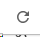. Then modify the loop to only add the odd terms. Do this by replacing the expressions in the loops to make them skip the even number. We use pythons division remainder operation: `n%d` gives the remainder of dividing `n` by `d` so `(n+1) % 2 != 0` is true only if `(n+1)` is odd.

------

**1.**
``` python
    expr = S[-1] + a[n + 1] * sin(2 * pi * (n + 1) * x)
```
with 
```
    if (n+1) % 2 != 0:
        expr = S[-1] + a[n + 1] * sin(2 * pi * (n + 1) * x)
    else:
        expr = S[-1] + 0 * sin(2 * pi * (n + 1) * x)
```

------

**2.**
``` python
    display(Latex(f"$S_{n + 1}(x)={latex(S[n + 1])}$"))
    fig.plot(x, S[n + 1], id=f"S{n + 1}")
```
with
```python
    if (n+1) % 2 != 0:
        display(Latex(f"$S_{n + 1}(x)={latex(S[n + 1])}$"))
        fig.plot(x, S[n + 1], id=f"S{n + 1}")
```

------

**3.**
``` python
    display(Latex(f"Plotting $\\mathrm{{Sq}}(x)-S_{n + 1}(x)$"))
    fig.plot(x, Sq(x)-S[n + 1], id=f"F-S{n + 1}")
```
with
```python
    if (n+1) % 2 != 0:
        display(Latex(f"Plotting $\\mathrm{{Sq}}(x)-S_{n + 1}(x)$"))
        fig.plot(x, Sq(x)-S[n + 1], id=f"F-S{n + 1}")
```

You can then make `Nmax` much larger. Probably 20 will work without issue. Try it. 